# K-Means Clustering

Input:
- `data`: The dataset to be clustered.
- `k`: The number of clusters to create.

Output:
- `clusters`: A list of `k` cluster centers.

Algorithm:

1. Randomly select `k` data points as initial cluster centers.

2. For each data point, calculate its distance to each cluster center.

3. Assign the data point to the cluster with the nearest center.

4. Calculate the new cluster centers as the mean of all data points assigned to each cluster.

5. Repeat steps 2-4 untill cluster centers no longer change significantly or a set number of iterations is reached.

6. Return the final `k` cluster centers.

![kmeans.gif](https://i.imgur.com/U7VwprE.gif)


In [1]:
# import libraries
from sklearn import datasets
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
import pandas as pd

#### Let's generate some synthetic data

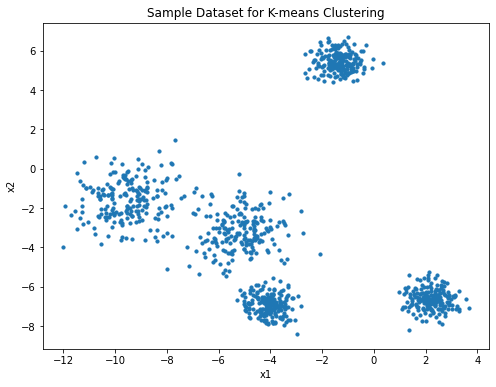

In [2]:
# Generate a sample dataset with three clusters
n_samples = 1000
n_features = 2
n_clusters = 5
std_clusters = [0.5, 0.5, 0.5, 1, 1]

X, y = datasets.make_blobs(n_samples = n_samples, n_features = n_features, centers = n_clusters, cluster_std = std_clusters, random_state = 111)

# Plot the generated dataset
plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], s = 10)
plt.title('Sample Dataset for K-means Clustering')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [3]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
k = 5
kmeans = KMeans(n_clusters = k, random_state = 0).fit(X)

Let's take a look at cluster centers -

In [4]:
print(kmeans.cluster_centers_)

[[-5.16949597 -3.17397257]
 [-4.05351568 -6.90941348]
 [-1.34304201  5.43215273]
 [-9.52314013 -1.56755724]
 [ 2.19461578 -6.62978549]]


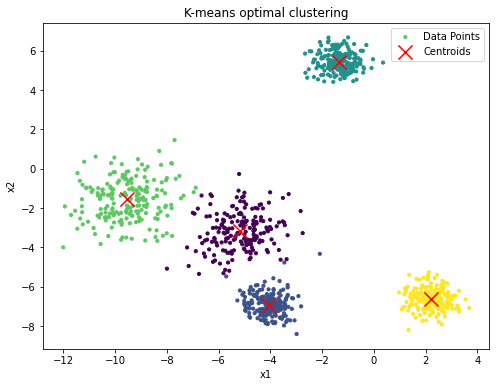

In [5]:
def plot_clusters(X, centers, labels, title):
	plt.figure(figsize=(8, 6))

	# Plot the data points colored by cluster
	plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=10, label='Data Points')

	# Plot the centroids
	plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')

	plt.title(title)
	plt.xlabel('x1')
	plt.ylabel('x2')
	plt.legend()
	plt.show()

plot_clusters(X, kmeans.cluster_centers_, kmeans.labels_, "K-means optimal clustering")

Now we can use the trained model to predict the class (cluster) of a new data point -

In [6]:
X_new = np.array([[0, 5], [0, 0], [-10, 3], [-6, -4]])
kmeans.predict(X_new)

array([2, 2, 3, 0], dtype=int32)

We can also plot the decision boundaries of the clusters -

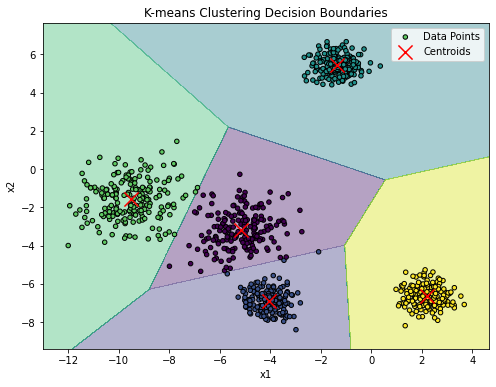

In [7]:
def plot_boundaries(X, kmeans):
	# Create a mesh grid to plot decision boundaries
	x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
	y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
	xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

	# Predict cluster labels for each point in the mesh grid
	Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
	Z = Z.reshape(xx.shape)

	# Plot the decision boundaries
	plt.figure(figsize=(8, 6))
	plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.4)
	plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, marker='o', s=20, label='Data Points', edgecolor='k')
	plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
	plt.title('K-means Clustering Decision Boundaries')
	plt.xlabel('x1')
	plt.ylabel('x2')
	plt.legend()
	plt.show()

plot_boundaries(X, kmeans)

### Hard vs Soft Clustering -

Hard Clustering - Each datapoint assigned to a single cluster.

Soft Clustering - A data point can belong to multiple clusters. Can you think of use cases where soft clustering would be useful? 

In [8]:
# distance between datapoints and clusters. For hard clustering choose the nearest one
kmeans.transform(X_new)

array([[ 9.67147952, 12.58034653,  1.41085712, 11.5681894 , 11.83504326],
       [ 6.06611824,  8.01067937,  5.59571667,  9.65129181,  6.98358032],
       [ 7.83911388, 11.55669292,  8.9921237 ,  4.59238222, 15.53838545],
       [ 1.17134891,  3.50049825, 10.5191617 ,  4.28127249,  8.6062477 ]])

In [9]:
kmeans.predict(X_new)

array([2, 2, 3, 0], dtype=int32)

### Does initial cluster initialization affect the final result?

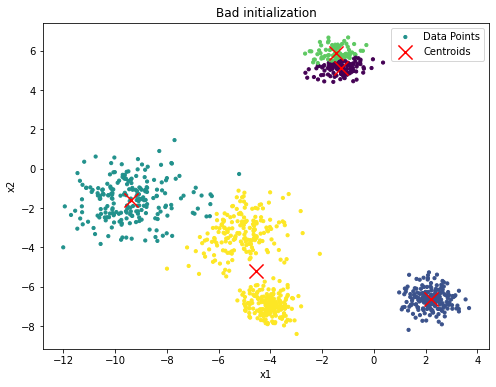

In [10]:
bad_init = np.array([[-4,-2], [-4,-2.1], [-4.1,-2], [-4,-2.1], [-4.05,-2]])
kmeans_bad_init = KMeans(n_clusters=5, init=bad_init, n_init=1)

kmeans_bad_init.fit(X)


plot_clusters(X, kmeans_bad_init.cluster_centers_, kmeans_bad_init.labels_, "Bad initialization")
# plot_boundaries(X, kmeans_bad_init)

### How can we determine the quality of clustering without visualizing?

Inertia - Means Squared distance between every point and it's corresponding centroid.

\begin{align}
\text{Inertia} = \sum_{i=1}^{K} \sum_{j=1}^{n_i} \left\|x_{ij} - \mu_i\right\|^2
\end{align}

$ K $ = number of clusters.

$ n_i $ = number of data points in cluster $ i $.

$ x_{ij} $ = $j^{th}$ data point in $i^{th}$ cluster.

${\mu}_{i}$ = the centroid of cluster $i$.


We aim for clustering with lower inertia.

In [11]:
print('Good Initialization inertia score : ', kmeans.inertia_)
print('Bad Initialization inertia score : ', kmeans_bad_init.inertia_)

Good Initialization inertia score :  1066.7105617418617
Bad Initialization inertia score :  2482.3524752049943


What was bad about the above initialization?

Check out how sklearn initializes cluster centers.

### How to decide the value of K (number of clusters)?

Let's try with k = 3 and k = 8

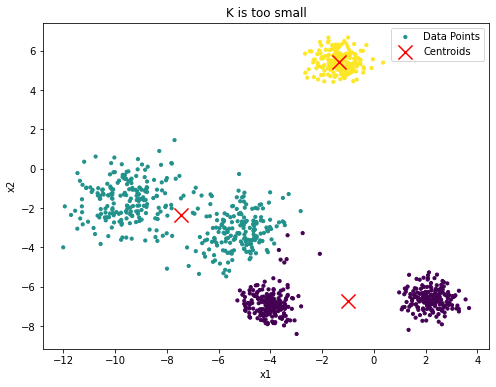

In [12]:
kmeans_3 = KMeans(n_clusters = 3).fit(X)
plot_clusters(X, kmeans_3.cluster_centers_, kmeans_3.labels_, "K is too small")

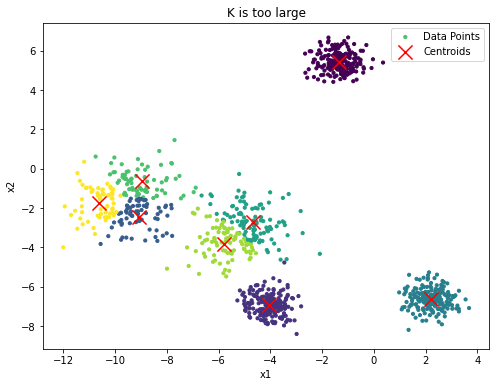

In [13]:
kmeans_8 = KMeans(n_clusters = 8).fit(X)
plot_clusters(X, kmeans_8.cluster_centers_, kmeans_8.labels_, "K is too large")

### Can we use inertia to decide the optimal K?

Let's plot inertia vs number of clusters -

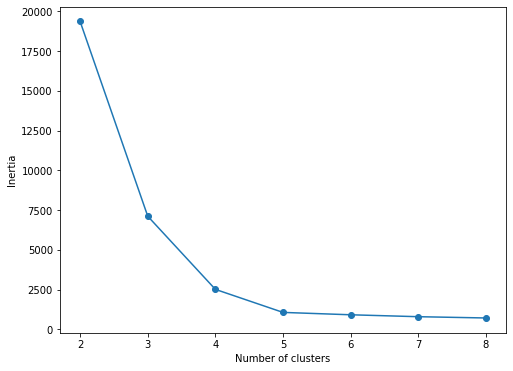

In [14]:
candidate_clusters=[2,3,4,5,6,7,8]
inertia_scores=[]
for cluster in candidate_clusters:
    kmeans=KMeans(cluster)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(candidate_clusters,inertia_scores,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The above graph looks like an arm where the elbow appears to be a good choice for K.

This is known as the `Elbow Method` for finding the optimal number of clusters.

`TASK` - Explore `Silhouette score` for finding the optimal number of clusters.

### Now let's use KMeans to perform clustering on a real world dataset

In [15]:
from sklearn.datasets import load_wine

wine_data = load_wine()

X = pd.DataFrame(wine_data.data, columns = wine_data.feature_names)
y = pd.DataFrame(wine_data.target, columns = ['target'])

print(X.shape)

(178, 13)


In [16]:
# Take a look at data and target
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [17]:
# number of classes in our data

y['target'].unique()

array([0, 1, 2])

Text(0, 0.5, 'Alcohol')

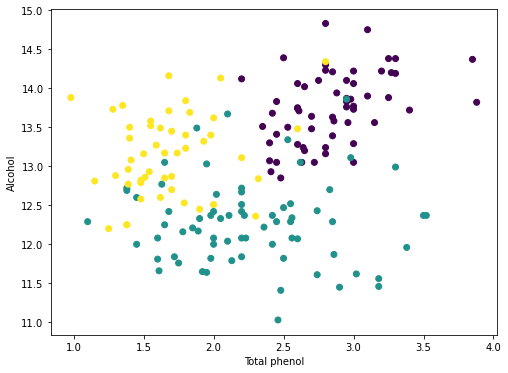

In [18]:
# Visualizing 13 features is difficult. Let's visualize any 2 of them.
phenol_alcohol_data = X.loc[:, ['total_phenols','alcohol']]
phenol_alcohol_data['target'] = y['target']

plt.figure(figsize = (8, 6))
plt.scatter(phenol_alcohol_data['total_phenols'], phenol_alcohol_data['alcohol'], c=phenol_alcohol_data['target'])
plt.xlabel('Total phenol')
plt.ylabel('Alcohol')

### Clustering using 2 features - 

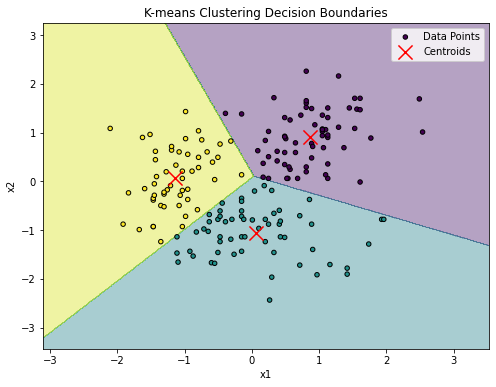

In [19]:
from sklearn.preprocessing import StandardScaler

phenol_alcohol_X = phenol_alcohol_data.drop('target',axis='columns',inplace=False)

std_scaler = StandardScaler()
kmeans_phenol_alcohol = KMeans(n_clusters = 3)

phenol_alcohol_X = std_scaler.fit_transform(phenol_alcohol_X)
kmeans_phenol_alcohol.fit(phenol_alcohol_X)

plot_boundaries(phenol_alcohol_X, kmeans_phenol_alcohol)

### `TASK` - Try clustering using all features